In [1]:
# --- Imports ---
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
# Set renderer to avoid errors in IDEs
pio.renderers.default = "notebook_connected"

In [3]:
# --- File path setup ---
processed_path = "../data/processed/Travel details dataset_cleaned.csv"

# --- Ensure directories exist ---
os.makedirs(os.path.dirname(processed_path), exist_ok=True)

# Load dataset
df = pd.read_csv(processed_path)
df.head()

,Destination,Dest_Country,Start date,End date,Month,Month_name,Year,Duration (days),Traveler age,Age_Group,...,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Fuel Price($/gal),Avg_Temperature,Climate,Accommodation cost category,Transportation cost category
0,"London, UK",UK,2023-05-01,2023-05-08,5,May,2023,7,35,Young Adult,...,American,Hotel,1200,Flight,600,3.666,12.891477,Cool,Low,Low
1,London,UK,2023-07-22,2023-07-28,7,July,2023,6,35,Young Adult,...,British,Hotel,1200,Train,150,3.712,12.891477,Cool,Low,Cheap
2,"London, UK",UK,2024-03-15,2024-03-23,3,March,2024,8,35,Young Adult,...,British,Hotel,1000,Train,200,3.542,12.891477,Cool,Low,Cheap
3,"Edinburgh, Scotland",UK,2024-09-05,2024-09-12,9,September,2024,7,32,Young Adult,...,British,Hotel,900,Train,150,3.338,12.891477,Cool,Cheap,Cheap
4,London,UK,2022-06-10,2022-06-15,6,June,2022,5,38,Young Adult,...,British,Hotel,900,Train,150,5.032,12.891477,Cool,Cheap,Cheap


In [ ]:
# --- Dashboard Visualizations ---

# Gender and Age Group Distribution (Donut Charts)
demographics = ["Traveler gender", "Age_Group"]
for col in demographics:
    fig = px.pie(df, names=col, hole=0.4, title=f"{col} Distribution")
    fig.show()

In [ ]:
# Nationality Distribution (Horizontal Bar Chart with Threshold)
nat_counts = df["Traveler nationality"].value_counts()
nat_counts = nat_counts[nat_counts > 2].reset_index()  # filter minor nationalities
nat_counts.columns = ["Traveler nationality", "Trip Count"]
fig = px.bar(
    nat_counts,
    y="Traveler nationality",
    x="Trip Count",
    orientation="h",
    title="Traveler Nationality (only those with >2 trips)",
    text="Trip Count",
)
fig.show()


In [ ]:
# Top 5 Destination Countries
country_counts = df["Dest_Country"].value_counts().nlargest(5).reset_index()
country_counts.columns = ["Destination Country", "Trip Count"]
fig = px.bar(
    country_counts,
    x="Destination Country",
    y="Trip Count",
    text="Trip Count",
    title="Top 10 Destination Countries",
)
fig.show()


In [ ]:
trip_counts = df["Dest_Country"].value_counts().reset_index()
trip_counts.columns = ["country", "trip_count"]
top_5 = trip_counts.head(5)

print("Top 5 Destination Countries:")
print(top_5)

Top 5 Destination Countries:
     country  trip_count
0     France          15
1        USA          13
2      Japan          13
3  Australia          13
4   Thailand          12


### 📦 Deployment Note: Plotly Visualizations

These Plotly charts are included to:

- Provide rich, interactive data exploration experiences.
- Render well when deployed to **GitHub** or hosted on static sites.
- Enable hover info, zoom, and tooltips for storytelling and user engagement.

💡 **Use Case:** Ideal for portfolio projects or public-facing dashboards on GitHub.

In [ ]:
import plotly.express as px
import pandas as pd

# Step 1: Count all destination trips
trip_counts = df["Dest_Country"].value_counts().reset_index()
trip_counts.columns = ["country", "trip_count"]

# Step 2: Identify top 5 countries
top_5 = trip_counts.nlargest(5, "trip_count")["country"].tolist()

# Step 3: Custom coloring
trip_counts["color_val"] = trip_counts.apply(
    lambda row: row["trip_count"] if row["country"] in top_5 else 0, axis=1
)

# Step 4: Plot
fig = px.choropleth(
    trip_counts,
    locations="country",
    locationmode="country names",
    color="color_val",
    hover_name="country",
    color_continuous_scale="YlOrRd",  # dark for highest trip count
    range_color=(0, trip_counts["color_val"].max()),
)

fig.update_layout(
    title="Destination Countries (Top 5 Colored by Trip Count)",
    coloraxis_colorbar=dict(title="Trip Count"),
)

fig.show()


In [ ]:
pio.write_html(fig, file="index.html", auto_open=False)

In [ ]:
# Choropleth Map – Top 5 Destination Countries by Trip Count
import plotly.graph_objects as go

# Get top 5 destination countries by count
geo = df["Dest_Country"].value_counts().nlargest(5).reset_index()
geo.columns = ["country", "trip_count"]

# Use Plotly's built-in country-to-lat/lon resolver
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        locations=geo["country"],
        locationmode="country names",
        text=geo["country"],  # This shows as label
        marker=dict(
            size=geo["trip_count"] * 0.5,  # adjust scale as needed
            color=geo["trip_count"],
            colorscale="Agsunset",
            colorbar_title="Trip Count",
            line_color="black",
        ),
    )
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth")
)

fig.show()


*Note* The code snippet below was formulated with the help of Chat GPT 4.0, primaririly for the use of python scripting in Power BI, so that we do not render the static image via export and import. However, due to changes, we did in the end deploy a plotly visualization via GitHUB linked to Power BI static image.

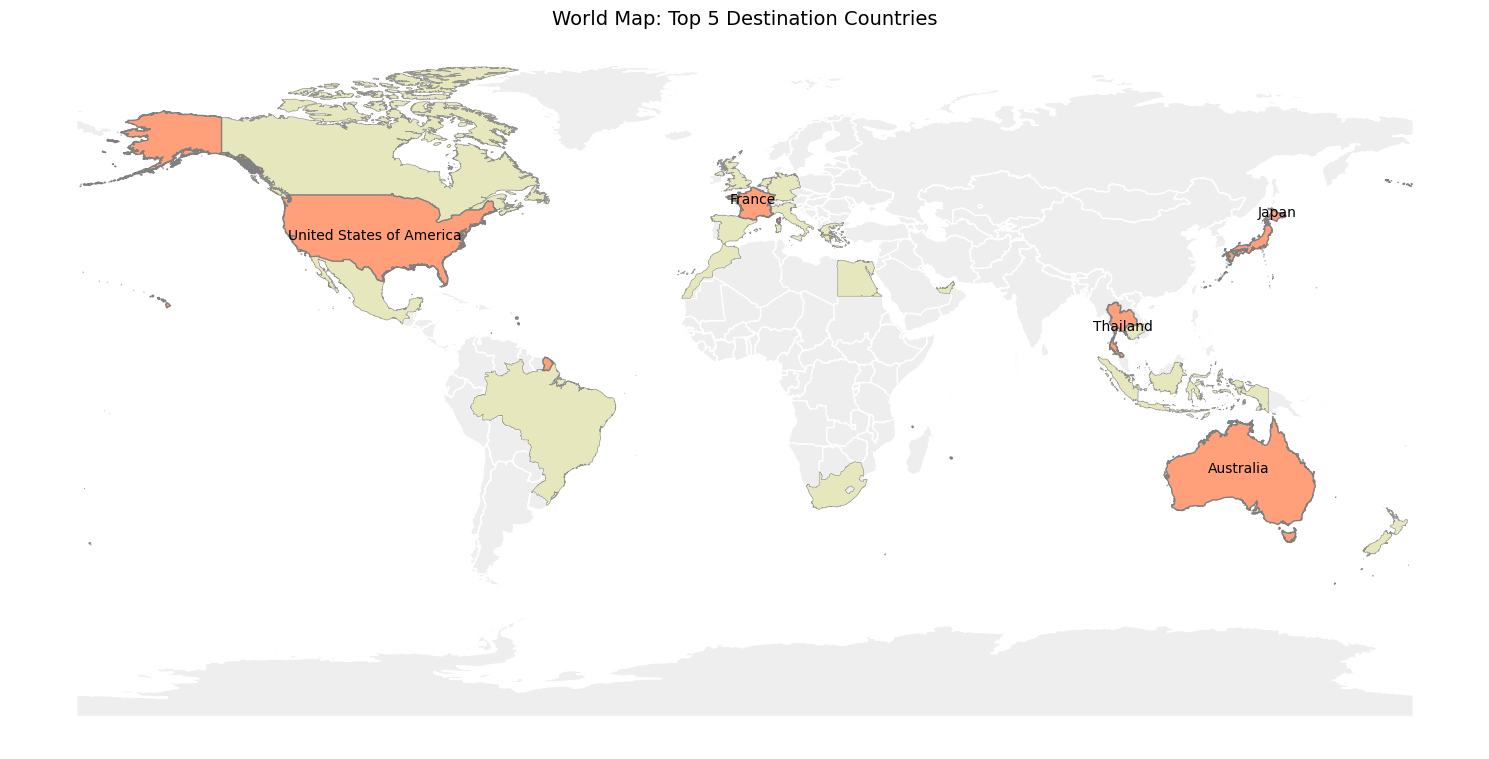

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load world map GeoDataFrame
url = "https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson"
world = gpd.read_file(url)

# Get trip counts per destination
trip_counts = df["Dest_Country"].value_counts().reset_index()
trip_counts.columns = ["country", "trip_count"]

# Fix mismatched names to match GeoJSON
replace_map = {
    "USA": "United States of America",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "Russia": "Russian Federation",
    "South Korea": "Korea, Republic of",
    "Vietnam": "Viet Nam",
    "Ivory Coast": "Côte d'Ivoire",
}
trip_counts["country"] = trip_counts["country"].replace(replace_map)

# Map trip count to world GeoDataFrame
world["trip_count"] = (
    world["name"].map(trip_counts.set_index("country")["trip_count"]).fillna(0)
)
world["is_destination"] = world["trip_count"] > 0

# Identify top 5 countries
top_5 = trip_counts.nlargest(5, "trip_count")["country"].tolist()
world["is_top5"] = world["name"].isin(top_5)

# Plot setup
fig, ax = plt.subplots(figsize=(15, 8))

# Base world map
world.plot(ax=ax, color="#eeeeee", edgecolor="white")  # full base map

# All destination countries (light beige)
world[world["is_destination"] & ~world["is_top5"]].plot(
    ax=ax, color="#e6e6b3", edgecolor="gray", linewidth=0.5, alpha=0.8
)

# Top 5 countries (highlight)
world[world["is_top5"]].plot(
    ax=ax, color="#ffa07a", edgecolor="gray", linewidth=1, alpha=1
)

# Label top 5 using representative point
for _, row in world[world["is_top5"]].iterrows():
    if not row.geometry.representative_point().is_empty:
        x, y = row.geometry.representative_point().coords[0]
        plt.text(x, y, row["name"], fontsize=10, ha="center", color="black")

# Styling
ax.set_facecolor("#d6ebf2")  # soft ocean
ax.set_title("World Map: Top 5 Destination Countries", fontsize=14)
ax.axis("off")
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Step 1: Get top 5 destination countries
geo = df["Dest_Country"].value_counts().nlargest(5).reset_index()
geo.columns = ["country", "trip_count"]

# Step 2: Use geopy to get lat/lon for each country
geolocator = Nominatim(user_agent="geoapi")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Create latitude and longitude columns
geo[["latitude", "longitude"]] = (
    geo["country"]
    .apply(lambda x: geocode(x))
    .apply(
        lambda loc: pd.Series([loc.latitude, loc.longitude])
        if loc
        else pd.Series([None, None])
    )
)

# Step 3: Plot with labels including coordinates
fig = go.Figure()

fig.add_trace(
    go.Scattergeo(
        lon=geo["longitude"],
        lat=geo["latitude"],
        text=geo.apply(
            lambda row: f"{row['country']}<br>Lat: {row['latitude']:.2f}, Lon: {row['longitude']:.2f}",
            axis=1,
        ),
        marker=dict(
            size=geo["trip_count"] * 0.5,
            color=geo["trip_count"],
            colorscale="Viridis",
            colorbar_title="Trip Count",
            line_color="black",
        ),
        mode="markers+text",
        textposition="top center",
    )
)

fig.update_layout(
    title="Top 5 Destination Countries with Coordinates",
    geo=dict(showframe=False, showcoastlines=True, projection_type="natural earth"),
)

fig.show()


In [ ]:
# Choropleth Map of Age-wise Traveler Count by Destination
age_dest_counts = (
    df.groupby(["Dest_Country", "Traveler age"]).size().reset_index(name="trip_count")
)
age_dest_counts.rename(columns={"Dest_Country": "country"}, inplace=True)
fig = px.choropleth(
    age_dest_counts,
    locations="country",
    locationmode="country names",
    color="trip_count",
    hover_name="Traveler age",
    title="Number of Travelers by Age and Destination Country",
    color_continuous_scale="Agsunset",
)
fig.show()

In [ ]:
pio.write_html(fig, file="travelerdest.html", auto_open=False)

# Hypothesis Visualizations

## Statistical Testing imports

In [15]:
import scipy.stats as stats
from scipy.stats import chi2_contingency, pearsonr

##  Hypothesis 1: Gender vs Destination Preference (Country)
**H0 (Null):** There is no significant difference in destination preference by gender.  
**H1 (Alt):** Gender significantly influences destination preference.

In [ ]:
# H1: Gender vs Destination (Top 10 by trip count)
top_dests = df["Dest_Country"].value_counts().nlargest(10).index
filtered_df = df[df["Dest_Country"].isin(top_dests)]

gender_dest = (
    filtered_df.groupby(["Dest_Country", "Traveler gender"]).size().unstack().fillna(0)
)
chi2, pval, _, _ = chi2_contingency(gender_dest)
print(f"Chi-squared Test (Gender vs Destination): p-value = {pval:.4f}")
fig = px.bar(
    gender_dest.reset_index().melt(id_vars="Dest_Country", value_name="count"),
    x="Dest_Country",
    y="count",
    color="Traveler gender",
    title="Top 10 Destination Preferences by Gender",
)
fig.show()


Chi-squared Test (Gender vs Destination): p-value = 0.7756


### H1 Conclusion


In [ ]:
conclusion_h1 = f"Chi-squared test result: p-value = {pval:.4f}\n" + (
    "→ Reject H0: Gender influences destination preference"
    if pval < 0.05
    else "→ Fail to reject H0: No significant gender-based destination preference"
)
print(conclusion_h1)

Chi-squared test result: p-value = 0.7756
→ Fail to reject H0: No significant gender-based destination preference


## Hypothesis 2: Age Group vs Trip Duration
**H0:** Age has no influence on trip duration.  
**H1:** Trip duration varies significantly with traveler age.

In [ ]:
# H2: Age Group vs Trip Duration
anova_result = stats.f_oneway(
    *[
        group["Duration (days)"].dropna().values
        for name, group in df.groupby("Age_Group")
    ]
)
print(f"ANOVA (Age Group vs Duration): p-value = {anova_result.pvalue:.4f}")
fig = px.box(
    df,
    x="Age_Group",
    y="Duration (days)",
    color="Age_Group",
    title="Trip Duration by Age Group",
)
fig.show()

ANOVA (Age Group vs Duration): p-value = 0.7933


In [ ]:
fig = px.violin(
    df,
    x="Age_Group",
    y="Duration (days)",
    color="Age_Group",
    box=True,
    points="all",
    title="Trip Duration by Age Group (Violin)",
)
fig.show()

### Conclusion H2

In [ ]:
conclusion_h2 = f"ANOVA test result: p-value = {anova_result.pvalue:.4f}\n" + (
    "→ Reject H0: Age influences trip duration"
    if anova_result.pvalue < 0.05
    else "→ Fail to reject H0: No significant effect of age on trip duration"
)
print(conclusion_h2)

ANOVA test result: p-value = 0.7933
→ Fail to reject H0: No significant effect of age on trip duration


## Hypothesis 3: Age Group vs Accommodation Cost
**H0:** There exists a strong correlation between traveler age and accommodation cost.  
**H1:** There is no significant correlation between traveler age and accommodation cost.


###  Bridging to Power BI: Seaborn and Matplotlib Plots

These plots are created using **Seaborn and Matplotlib** because:

- Power BI supports **Python visual integration**, which runs static Python scripts using these libraries.
- These plots can be **easily exported as PNGs** or used in **Power BI dashboards**.





C:\Users\baner\AppData\Local\Temp\ipykernel_26132\2328683980.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\baner\AppData\Local\Temp\ipykernel_26132\2328683980.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




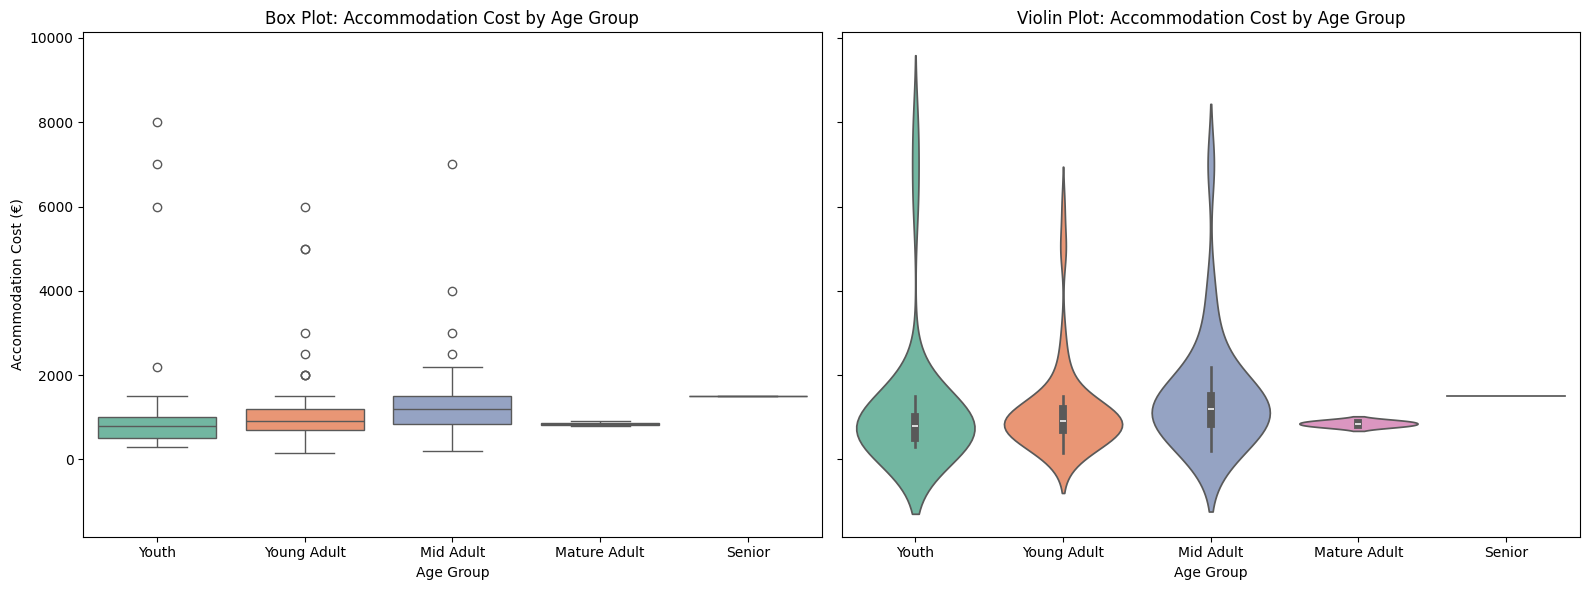

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the order of age groups (to ensure correct sequence)
age_order = ["Youth", "Young Adult", "Mid Adult", "Mature Adult", "Senior"]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Box Plot
sns.boxplot(
    data=df,
    x="Age_Group",
    y="Accommodation cost",
    order=age_order,
    palette="Set2",
    ax=axes[0],
)
axes[0].set_title("Box Plot: Accommodation Cost by Age Group")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Accommodation Cost (€)")

# Violin Plot
sns.violinplot(
    data=df,
    x="Age_Group",
    y="Accommodation cost",
    order=age_order,
    palette="Set2",
    ax=axes[1],
)
axes[1].set_title("Violin Plot: Accommodation Cost by Age Group")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("")  # Shared y-axis

# Layout
plt.tight_layout()
plt.show()


## Conclusion H3

In [ ]:
conclusion_h3 = f"Pearson correlation: r = {corr3:.2f}, p-value = {pval3:.4f}\n" + (
    "→ Reject H0: Age correlates with cost"
    if pval3 < 0.05
    else "→ Fail to reject H0: Weak/no correlation"
)

print(conclusion_h3)

Pearson correlation: r = 0.04, p-value = 0.6633
→ Fail to reject H0: Weak/no correlation


##  Hypothesis 4: Age Group vs Destination Preference (Country)
**H0:** Traveler age is not associated with travel destination.  
**H1:** Traveler age is associated with preferred travel destinations.

In [ ]:
pivot5 = df.groupby(["Dest_Country", "Age_Group"]).size().unstack().fillna(0)
chi2_5, pval_5, _, _ = chi2_contingency(pivot5)
print(f"Chi-squared Test (Age Group vs Destination): p-value = {pval_5:.4f}")
fig = px.bar(
    pivot5.reset_index().melt(id_vars="Dest_Country", value_name="count"),
    x="Dest_Country",
    y="count",
    color="Age_Group",
    title="Destination Preferences by Age Group",
)
fig.update_layout(yaxis_title="Traveler Counts per Country by Age Group")

fig.show()


Chi-squared Test (Age Group vs Destination): p-value = 0.5155


## Conclusion H4

In [ ]:
conclusion_h4 = f"Chi-squared test result: p-value = {pval_5:.4f}\n" + (
    "→ Reject H₀: Age group influences destination choice"
    if pval_5 < 0.05
    else "→ Fail to reject H₀: No significant association between age group and destination"
)
print(conclusion_h4)


Chi-squared test result: p-value = 0.5155
→ Fail to reject H₀: No significant association between age group and destination


##  Hypothesis 5: Age Group vs Accommodation Type
**H0:** There is a strong association between traveler age and accommodation type.  
**H1:** No such association exists between traveler age and accommodation type.

In [ ]:
pivot_h5 = df.groupby(["Age_Group", "Accommodation type"]).size().unstack().fillna(0)
chi2_h5, pval_h5, _, _ = chi2_contingency(pivot_h5)
print(f"Chi-squared Test (Age Group vs Accommodation Type): p-value = {pval_h5:.4f}")

Chi-squared Test (Age Group vs Accommodation Type): p-value = 0.5185


In [ ]:
conclusion_h5 = f"Chi-squared test result: p-value = {pval_h5:.4f}\n" + (
    "→ Reject H₀: Age group is associated with accommodation type"
    if pval_h5 < 0.05
    else "→ Fail to reject H₀: No significant association"
)
print(conclusion_h5)

Chi-squared test result: p-value = 0.5185
→ Fail to reject H₀: No significant association


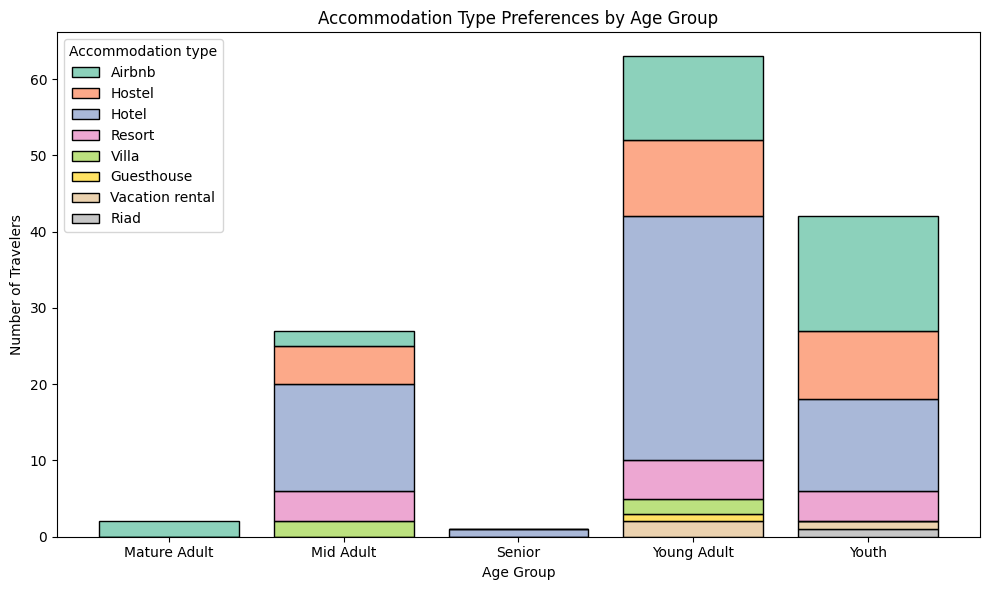

In [ ]:
# Count combinations
stacked_data = (
    df.groupby(["Age_Group", "Accommodation type"]).size().reset_index(name="count")
)

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(
    data=stacked_data,
    x="Age_Group",
    weights="count",
    hue="Accommodation type",
    multiple="stack",
    shrink=0.8,
    palette="Set2",
)
plt.title("Accommodation Type Preferences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Travelers")
plt.tight_layout()
plt.show()

##  Hypothesis 6: Transportation Cost vs Fuel Price
**H0:** Transportation cost and fuel price have no significant relationship.  
**H1:** Transportation cost is significantly affected by fuel price.

In [ ]:
clean_h6 = df[["Fuel Price($/gal)", "Transportation cost"]].dropna()
corr_h6, pval_h6 = pearsonr(
    clean_h6["Fuel Price($/gal)"], clean_h6["Transportation cost"]
)
print(
    f"Pearson correlation (Fuel vs Transport Cost): r = {corr_h6:.2f}, p-value = {pval_h6:.4f}"
)

conclusion_h6 = f"Pearson correlation: r = {corr_h6:.2f}, p-value = {pval_h6:.4f}\n" + (
    "→ Reject H₀: Fuel price influences transport cost"
    if pval_h6 < 0.05
    else "→ Fail to reject H₀: No strong linear relationship"
)
print(conclusion_h6)


Pearson correlation (Fuel vs Transport Cost): r = -0.01, p-value = 0.8658
Pearson correlation: r = -0.01, p-value = 0.8658
→ Fail to reject H₀: No strong linear relationship


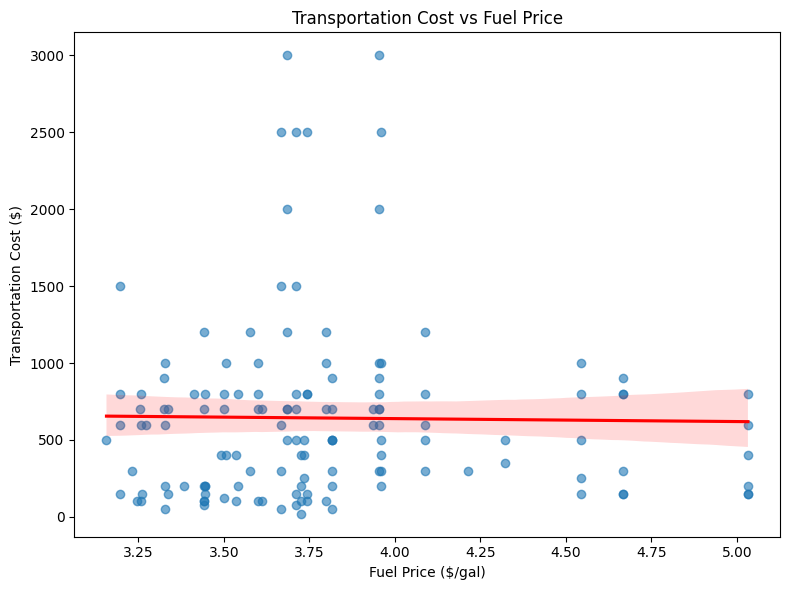

In [53]:
# Drop missing values
clean_h6 = df[["Fuel Price($/gal)", "Transportation cost"]].dropna()

# Plot
plt.figure(figsize=(8, 6))
sns.regplot(
    data=clean_h6,
    x="Fuel Price($/gal)",
    y="Transportation cost",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"},
)
plt.title("Transportation Cost vs Fuel Price")
plt.xlabel("Fuel Price ($/gal)")
plt.ylabel("Transportation Cost ($)")
plt.tight_layout()
plt.show()

###  Observed Trend:

- The regression line is nearly flat, indicating **very weak or no linear relationship**.
- Transportation costs vary greatly even when fuel prices are similar.
- This suggests that other factors—like distance, travel mode, and time—may be more important drivers of transport cost.

## Hypothesis 7: Fuel Price vs Temperature

**H0:** There is no strong association between fuel price and temperature.  
**H1:** There is a strong association between fuel price and temperature.

In [ ]:
clean_h7 = df[["Avg_Temperature", "Fuel Price($/gal)"]].dropna()
corr_h7, pval_h7 = pearsonr(clean_h7["Avg_Temperature"], clean_h7["Fuel Price($/gal)"])
print(
    f"Pearson correlation (Temp vs Fuel Price): r = {corr_h7:.2f}, p-value = {pval_h7:.4f}"
)

conclusion_h7 = f"Pearson correlation: r = {corr_h7:.2f}, p-value = {pval_h7:.4f}\n" + (
    "→ Reject H₀: Temperature is associated with fuel price"
    if pval_h7 < 0.05
    else "→ Fail to reject H₀: No strong linear association"
)
print(conclusion_h7)


Pearson correlation (Temp vs Fuel Price): r = -0.06, p-value = 0.5006
Pearson correlation: r = -0.06, p-value = 0.5006
→ Fail to reject H₀: No strong linear association


In [ ]:
# H7: Fuel Price vs Temperature (Statistical Test)

# Drop rows with missing values in the two columns
clean_df = df[["Avg_Temperature", "Fuel Price($/gal)"]].dropna()

# Perform Pearson correlation test
corr, pval = stats.pearsonr(clean_df["Avg_Temperature"], clean_df["Fuel Price($/gal)"])
print(f"Pearson correlation: {corr:.2f}, p-value: {pval:.4f}")

# Line chart: average fuel price by climate zone (mean temp)
avg_temp = (
    df.groupby("Climate")[["Avg_Temperature", "Fuel Price($/gal)"]].mean().reset_index()
)
fig = px.line(
    avg_temp,
    x="Avg_Temperature",
    y="Fuel Price($/gal)",
    color="Climate",
    markers=True,
    title="Average Fuel Price vs Avg Temperature by Climate Zone",
)
fig.show()

# Overall regression across entire dataset
fig = px.scatter(
    clean_df,
    x="Avg_Temperature",
    y="Fuel Price($/gal)",
    trendline="ols",
    title="Fuel Price vs Avg Temperature (Overall Regression)",
)
fig.show()

Pearson correlation: -0.06, p-value: 0.5006


###  Observed Trend:

- The regression line is flat and the scatter plot shows no strong directional trend.
- Fuel prices appear **uniformly distributed across all temperature ranges**.
- Climate or seasonal temperature changes do not seem to influence fuel pricing in this dataset.

## Hypothesis 8: Temporal Total Cost

**H0:** The war situation during 2022–23 and COVID times during 2019–22 did not affect the fuel price.  
**H1:** There was a price hike post 2022–23 war situation, while the fuel prices plummeted during 2019–22 COVID times.

In [ ]:
# H8: Global Events Affect Fuel Price
fuel_trend = df.groupby(["Year", "Month"])["Fuel Price($/gal)"].mean().reset_index()
fuel_trend["Date"] = pd.to_datetime(fuel_trend[["Year", "Month"]].assign(DAY=1))
fig = px.line(
    fuel_trend, x="Date", y="Fuel Price($/gal)", title="Fuel Price Trend Over Time"
)

# COVID: 2019–2022
fig.add_shape(
    type="rect",
    x0="2019-01-01",
    x1="2022-01-01",
    y0=0,
    y1=1,
    yref="paper",
    line=dict(width=0),
    fillcolor="red",
    opacity=0.2,
)
fig.add_annotation(
    x="2020-07-01",
    y=1,
    yref="paper",
    text="COVID (2019–2022)",
    showarrow=False,
    bgcolor="white",
)

# Ukraine War: 2022–2023
fig.add_shape(
    type="rect",
    x0="2022-02-01",
    x1="2023-12-31",
    y0=0,
    y1=1,
    yref="paper",
    line=dict(width=0),
    fillcolor="orange",
    opacity=0.2,
)
fig.add_annotation(
    x="2023-01-01",
    y=1,
    yref="paper",
    text="Ukraine War (2022–2023)",
    showarrow=False,
    bgcolor="white",
)

fig.show()

c:\Users\baner\OneDrive\Documenti\data_analytics_AI\Travel_analysis_Hackathon\travel_trends\.venv\Lib\site-packages\_plotly_utils\basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



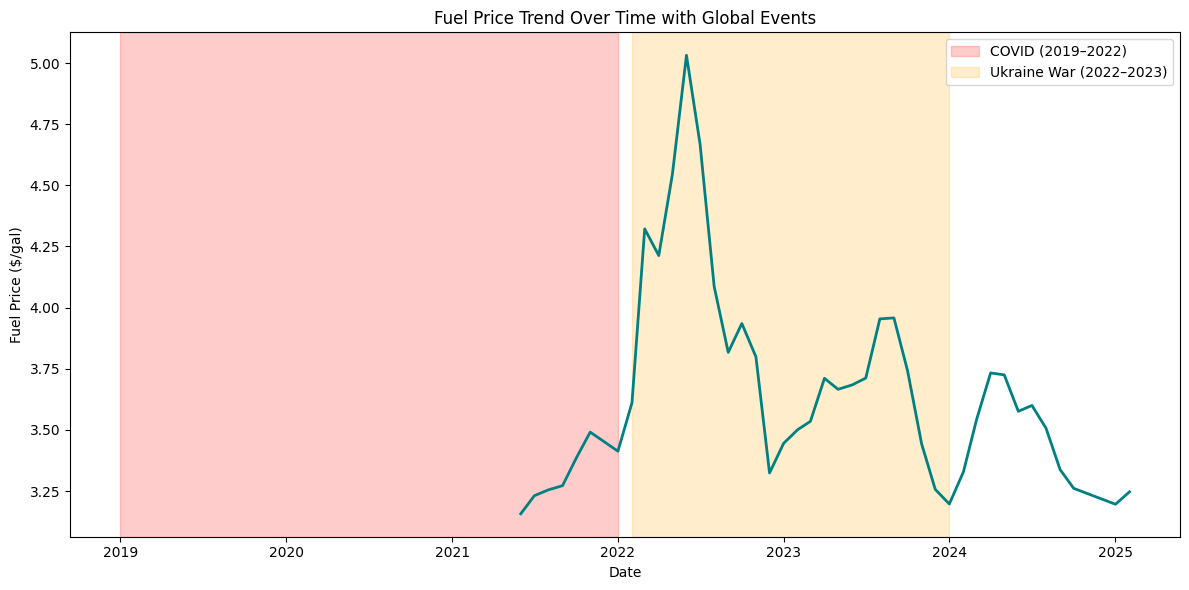

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare fuel trend data
fuel_trend = df.groupby(["Year", "Month"])["Fuel Price($/gal)"].mean().reset_index()
fuel_trend["Date"] = pd.to_datetime(fuel_trend[["Year", "Month"]].assign(DAY=1))

# Plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=fuel_trend, x="Date", y="Fuel Price($/gal)", color="teal", linewidth=2
)

# Add shaded regions for COVID and Ukraine War
plt.axvspan(
    pd.to_datetime("2019-01-01"),
    pd.to_datetime("2022-01-01"),
    color="red",
    alpha=0.2,
    label="COVID (2019–2022)",
)
plt.axvspan(
    pd.to_datetime("2022-02-01"),
    pd.to_datetime("2023-12-31"),
    color="orange",
    alpha=0.2,
    label="Ukraine War (2022–2023)",
)

# Styling
plt.title("Fuel Price Trend Over Time with Global Events")
plt.xlabel("Date")
plt.ylabel("Fuel Price ($/gal)")
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
conclusion_h8 = (
    "Visual trends suggest:\n"
    "- Fuel prices dropped during COVID (2019–2022) however sparse data does not confirm this completely.\n"
    "- Prices rose sharply post-Feb 2022 during the Ukraine war.\n"
    "→ Indicates external global events affected fuel prices."
)
print(conclusion_h8)

Visual trends suggest:
- Fuel prices dropped during COVID (2019–2022) however sparse data does not confirm this completely.
- Prices rose sharply post-Feb 2022 during the Ukraine war.
→ Indicates external global events affected fuel prices.
